In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_train = pd.read_csv(
    "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
)

In [3]:
#  2. BASIC CLEANING
# # ===============================

# # 2.1 Drop ID column
df_train.drop(columns=["Id"], inplace=True)

In [4]:
df_train.head()
df_train.tail()
df_train.sample(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1082,20,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,192000
806,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
491,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000
843,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,141000
185,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [5]:
df_train.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.isnull().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 80, dtype: int64

In [7]:
(df_train.isnull().sum() / len(df_train)) * 100


MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [8]:
df_train.nunique().sort_values(ascending=False)


LotArea         1073
GrLivArea        861
BsmtUnfSF        780
1stFlrSF         753
TotalBsmtSF      721
                ... 
BsmtHalfBath       3
Utilities          2
Street             2
Alley              2
CentralAir         2
Length: 80, dtype: int64

In [9]:
df_train["Neighborhood"].value_counts()


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [10]:
df_train["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

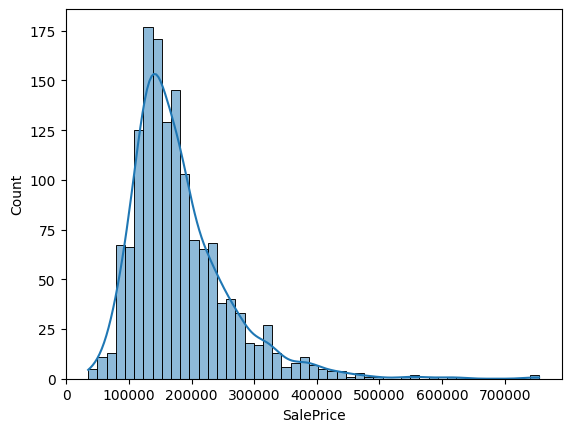

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train["SalePrice"], kde=True)
plt.show()


In [12]:
df_train.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [13]:
df_train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [14]:

(df_train.isnull().sum() / len(df_train)) * 100


MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [15]:
cat_cols = df_train.select_dtypes(include="object").columns
df_train[cat_cols].isnull().mean().sort_values(ascending=False)


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageCond       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
Electrical       0.000685
Condition1       0.000000
Condition2       0.000000
LotShape         0.000000
Street           0.000000
MSZoning         0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities        0.000000
LandContour      0.000000
RoofStyle        0.000000
Heating          0.000000
ExterCond        0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
BldgType         0.000000
HeatingQC        0.000000
CentralAir       0.000000
KitchenQual 

In [16]:
df_train.columns



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
cat_cols = df_train.select_dtypes(include="object").columns
df_train[cat_cols].isnull().mean().sort_values(ascending=False)


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageCond       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
Electrical       0.000685
Condition1       0.000000
Condition2       0.000000
LotShape         0.000000
Street           0.000000
MSZoning         0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities        0.000000
LandContour      0.000000
RoofStyle        0.000000
Heating          0.000000
ExterCond        0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
BldgType         0.000000
HeatingQC        0.000000
CentralAir       0.000000
KitchenQual 

In [18]:
df_train.nunique()


MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [19]:
df_train.corr(numeric_only=True)["SalePrice"]
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())


In [20]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]


Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
num_cols = df_train.select_dtypes(include="number").columns
num_cols
for col in num_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())


In [22]:
cat_cols = df_train.select_dtypes(include="object").columns
df_train[cat_cols].isnull().mean().sort_values(ascending=False)
# pehle hi data se 50< wla columns udd gya 

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageCond       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
Electrical       0.000685
Condition1       0.000000
Condition2       0.000000
LotShape         0.000000
Street           0.000000
MSZoning         0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities        0.000000
LandContour      0.000000
RoofStyle        0.000000
Heating          0.000000
ExterCond        0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
BldgType         0.000000
HeatingQC        0.000000
CentralAir       0.000000
KitchenQual 

In [23]:
print("Total null values:", df_train.isnull().sum().sum())


Total null values: 7481


In [24]:
cat_cols = df_train.select_dtypes(include="object").columns
cat_cols
for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])


In [25]:
print("Total null values:", df_train.isnull().sum().sum())


Total null values: 0


In [26]:
# missing_percent = df_train[cat_cols].isnull().mean()*100
# cols_to_drop = missing_percent[missing_percent>50].index
# df_train.drop(columns= cols_to_drop,inplace=True)
# df_train.drop(columns=cols_to_drop,inplace=True)
# print("Dropped columns",list(cols_to_drop))


# aise new colm bna kr rkha jata h before drop aur filling aage ke liye

In [27]:
df_train.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [28]:
Q1 = df_train["SalePrice"].quantile(0.25)
Q3 = df_train["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [29]:
before = df_train.shape[0]

df_train = df_train[
(df_train["SalePrice"]>= lower) &
(df_train["SalePrice"]<= upper)
]

after = df_train.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Outliers removed:", before - after)

Rows before: 1460
Rows after : 1399
Outliers removed: 61


In [30]:
df_train["SalePrice"].skew()


np.float64(0.6797386630838265)

In [31]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])


In [32]:
# df_train["SalePrice"].skew()--> pta nhi khud se pehle se ho chuka th


In [33]:
df_train.duplicated().sum()


np.int64(0)

In [34]:
df_train["SalePrice"].describe()
df_train = df_train[df_train["SalePrice"] > 0]



In [35]:
int(df_train.isnull().sum().sum())


0

In [36]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:
df_train.head()

#yha pe label encoding ho chuki h dubara chala liy iskliye bekar ho gy nhi --> classes mein columns th

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,12.429220


In [38]:
cat_cols = df_train.select_dtypes(include="object").columns

for col in cat_cols:
    print(df_train[col].value_counts())

MSZoning
RL         1093
RM          216
FV           64
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1393
Grvl       6
Name: count, dtype: int64
Alley
Grvl    1358
Pave      41
Name: count, dtype: int64
LotShape
Reg    898
IR1    457
IR2     35
IR3      9
Name: count, dtype: int64
LandContour
Lvl    1261
Bnk      63
HLS      41
Low      34
Name: count, dtype: int64
Utilities
AllPub    1398
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1008
Corner      255
CulDSac      86
FR2          46
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1326
Mod      61
Sev      12
Name: count, dtype: int64
Neighborhood
NAmes      224
CollgCr    148
OldTown    112
Edwards    100
Somerst     84
Gilbert     78
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
NridgHt     50
Mitchel     49
Crawfor     48
IDOTRR      37
Timber      35
NoRidge     30
ClearCr     28
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
StoneBr     16
Veenke

In [39]:
for col in cat_cols:
    rare = df_train[col].value_counts(normalize=True)
    rare = rare[rare < 0.01]   # <1%
    if len(rare) > 0:
        print(f"\n⚠️ Rare categories in {col}:")
        print(rare)



⚠️ Rare categories in MSZoning:
MSZoning
C (all)    0.007148
Name: proportion, dtype: float64

⚠️ Rare categories in Street:
Street
Grvl    0.004289
Name: proportion, dtype: float64

⚠️ Rare categories in LotShape:
LotShape
IR3    0.006433
Name: proportion, dtype: float64

⚠️ Rare categories in Utilities:
Utilities
NoSeWa    0.000715
Name: proportion, dtype: float64

⚠️ Rare categories in LotConfig:
LotConfig
FR3    0.002859
Name: proportion, dtype: float64

⚠️ Rare categories in LandSlope:
LandSlope
Sev    0.008578
Name: proportion, dtype: float64

⚠️ Rare categories in Neighborhood:
Neighborhood
Veenker    0.007148
NPkVill    0.006433
Blueste    0.001430
Name: proportion, dtype: float64

⚠️ Rare categories in Condition1:
Condition1
RRAe    0.007863
PosA    0.005718
RRNn    0.003574
RRNe    0.001430
Name: proportion, dtype: float64

⚠️ Rare categories in Condition2:
Condition2
Feedr     0.004289
Artery    0.001430
RRNn      0.001430
PosN      0.000715
PosA      0.000715
RRAn      0.0

In [40]:
# if jo classes h per columns<1 % h to uska alag column mt bnao  others mein add kr do

cat_cols = df_train.select_dtypes(include="object").columns
threshold = 0.01   # 1%

for col in cat_cols:
    freq = df_train[col].value_counts(normalize=True)
    rare_labels = freq[freq < threshold].index
    
    
    df_train[col] = df_train[col].replace(rare_labels, "Other")

#value caount nikala jiska threshold se kam tha ek class ki value bs Other label dekr store kr liy


In [79]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [41]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
    


In [42]:
print(df_train.select_dtypes(include="object").columns)

Index([], dtype='object')


In [43]:
X = df_train.drop(columns=["SalePrice"])
y = df_train["SalePrice"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [46]:
df_fe_train = X_train.copy()
df_fe_val   = X_test.copy()


In [47]:
# TRAIN
df_fe_train["BathRatio"] = df_fe_train["FullBath"]/(df_fe_train["BedroomAbvGr"]+1)
df_fe_train["Garage_per_car"] = df_fe_train["GarageArea"]/(df_fe_train["GarageCars"]+1)
df_fe_train["HouseAge"] = df_fe_train["YrSold"] - df_fe_train["YearBuilt"]
df_fe_train["RemodAge"] = df_fe_train["YrSold"] - df_fe_train["YearRemodAdd"]

df_fe_train["TotalSF"] = (
    df_fe_train["TotalBsmtSF"] +
    df_fe_train["1stFlrSF"] +
    df_fe_train["2ndFlrSF"]
)

df_fe_train["TotalBath"] = (
    df_fe_train["FullBath"] +
    0.5 * df_fe_train["HalfBath"] +
    df_fe_train["BsmtFullBath"] +
    0.5 * df_fe_train["BsmtHalfBath"]
)


In [48]:
df_fe_val = df_fe_val.copy()
# same feature code yahan bhi paste

# VALIDATION

df_fe_val["BathRatio"] = df_fe_val["FullBath"] / (df_fe_val["BedroomAbvGr"] + 1)
df_fe_val["Garage_per_car"] = df_fe_val["GarageArea"] / (df_fe_val["GarageCars"] + 1)
df_fe_val["HouseAge"] = df_fe_val["YrSold"] - df_fe_val["YearBuilt"]
df_fe_val["RemodAge"] = df_fe_val["YrSold"] - df_fe_val["YearRemodAdd"]

df_fe_val["TotalSF"] = (
    df_fe_val["TotalBsmtSF"] +
    df_fe_val["1stFlrSF"] +
    df_fe_val["2ndFlrSF"]
)

df_fe_val["TotalBath"] = (
    df_fe_val["FullBath"] +
    0.5 * df_fe_val["HalfBath"] +
    df_fe_val["BsmtFullBath"] +
    0.5 * df_fe_val["BsmtHalfBath"]
)



In [49]:
# SalePrice ko train features ke saath jodo
df_corr = df_fe_train.copy()
df_corr["SalePrice"] = y_train

# correlation with target
corr = df_corr.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

# optional: threshold
selected_features = corr[abs(corr) > 0.1].index

df_corr_selected = df_corr[selected_features]


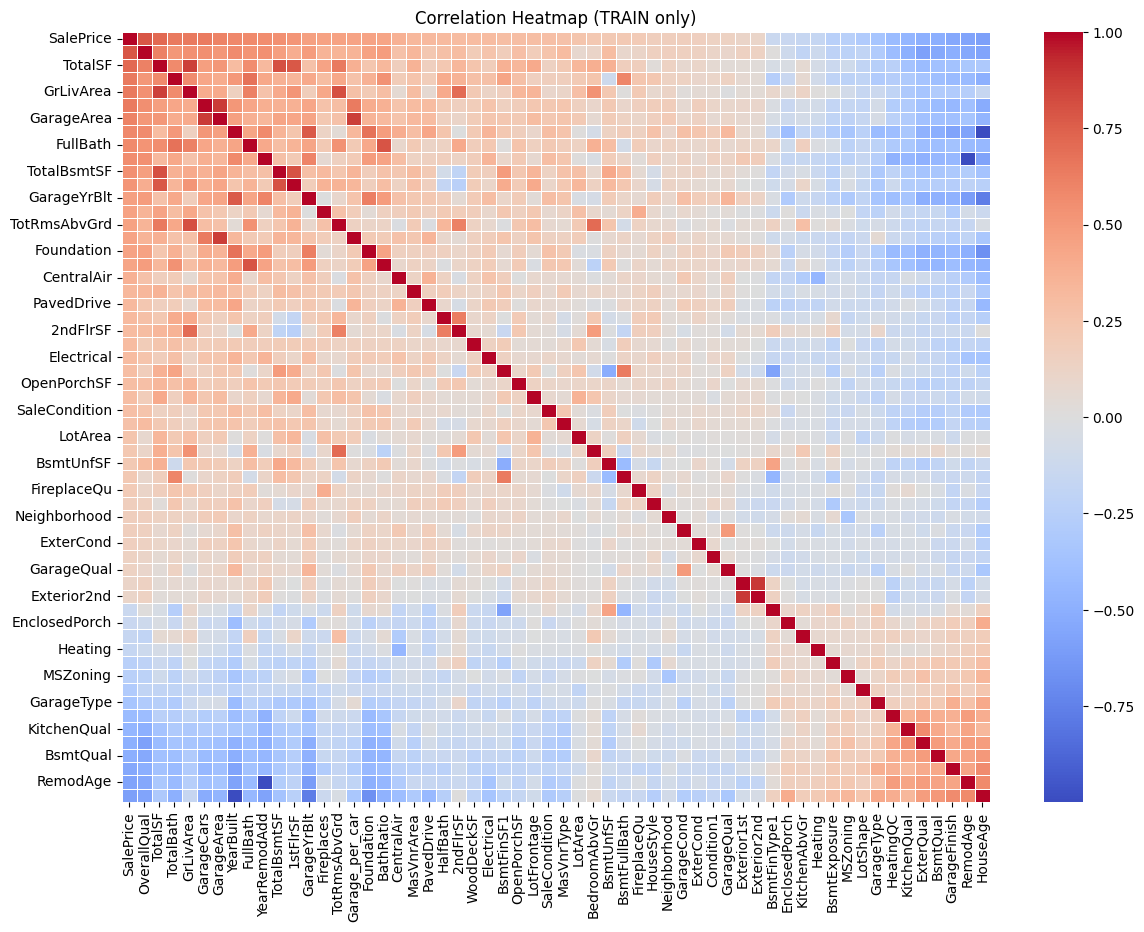

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(
    df_corr_selected.corr(),
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (TRAIN only)")
plt.show()



In [51]:
# kitna change hoga ek change krne se?

from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(df_fe_train, y_train, random_state=42)
mi_scores = pd.Series(mi, index=df_fe_train.columns).sort_values(ascending=False)

top_mi_features = mi_scores.head(30).index



In [52]:
#feature sekection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=30)

rfe.fit(df_fe_train, y_train)

selected_rfe_features = df_fe_train.columns[rfe.support_]
selected_rfe_features


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LandSlope', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Foundation', 'BsmtQual', 'CentralAir',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'MiscFeature', 'SaleCondition', 'BathRatio',
       'TotalBath'],
      dtype='object')

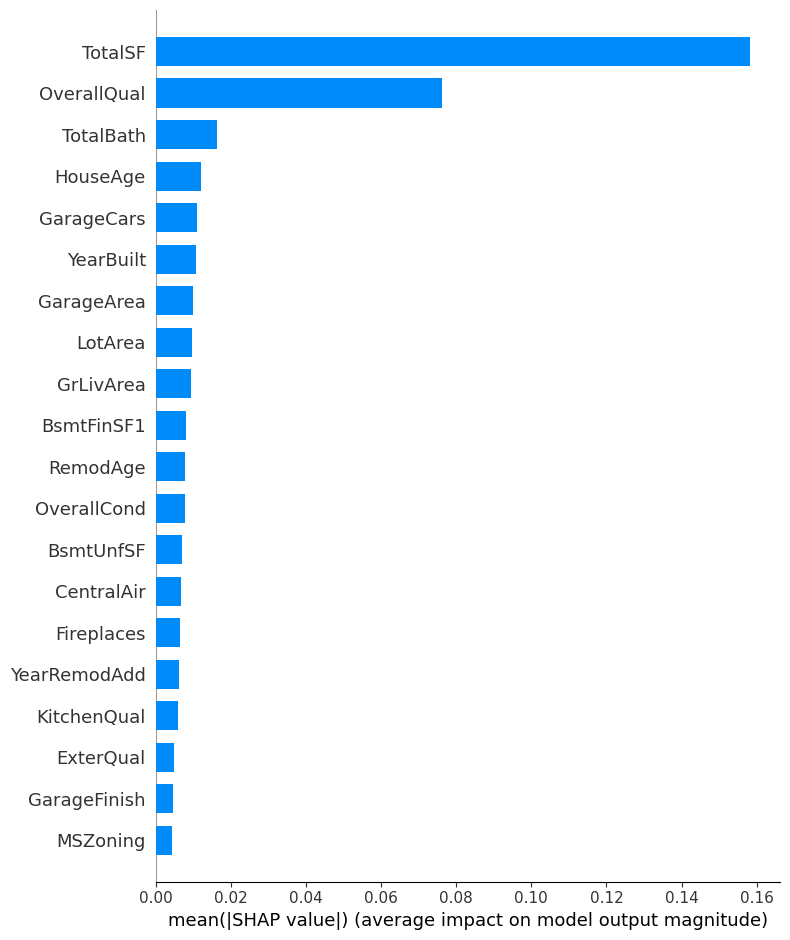

In [53]:
#model lgane ke baad smjhna h kon sa axa h in grsph
import shap
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(df_fe_train, y_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(df_fe_train)

shap.summary_plot(shap_values, df_fe_train, plot_type="bar")


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_fe_train, y_train)

lr_pred = lr.predict(df_fe_val)
print("Linear Regression RMSE:", rmse(y_test, lr_pred))


Linear Regression RMSE: 0.1295478861932133


In [56]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)

dt.fit(df_fe_train, y_train)

dt_pred = dt.predict(df_fe_val)
print("Decision Tree RMSE:", rmse(y_test, dt_pred))


Decision Tree RMSE: 0.1533531790020534


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(df_fe_train, y_train)

rf_pred = rf.predict(df_fe_val)
print("Random Forest RMSE:", rmse(y_test, rf_pred))


Random Forest RMSE: 0.12365456276884797


In [58]:
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping


In [59]:
from xgboost import XGBRegressor

xgb_final = XGBRegressor(
    n_estimators=500,        # ⬇️ controlled
    max_depth=3,             # ⬇️ shallow trees
    learning_rate=0.03,      # ⬇️ slow learning
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2.0,
    objective="reg:squarederror",
    random_state=42
)

xgb_final.fit(df_fe_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
train_pred = xgb_final.predict(df_fe_train)
val_pred   = xgb_final.predict(df_fe_val)

print("Train RMSE:", rmse(y_train, train_pred))
print("Validation RMSE:", rmse(y_test, val_pred))


Train RMSE: 0.07608827635951639
Validation RMSE: 0.11012279362727984


In [63]:
# TRAIN RMSE
train_pred = xgb_final.predict(df_fe_train)
train_rmse = rmse(y_train, train_pred)

# VALIDATION RMSE
val_pred = xgb_final.predict(df_fe_val)
val_rmse = rmse(y_test, val_pred)

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)


Train RMSE: 0.07608827635951639
Validation RMSE: 0.11012279362727984


**Tilll here all things are done we have to see only of test data csv**

In [104]:
import pandas as pd
import numpy as np

# Combine train + validation
X_full = pd.concat([df_fe_train, df_fe_val], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Re-train final model on full data
xgb_final.fit(X_full, y_full)


# yha tk ho chuka iske aage test data k kaam h

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [143]:
# 🔥 RESET TEST DATA (fresh start)

df_test = pd.read_csv(
    "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"
)

test_ids = df_test["Id"]
df_test.drop(columns=["Id"], inplace=True)


In [144]:
# numeric
for col in num_cols:
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(df_train[col].median())

# categorical
for col in cat_cols:
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(df_train[col].mode()[0])


In [145]:
for col in cat_cols:
    if col in df_test.columns:
        known = set(label_encoders[col].classes_)
        df_test[col] = df_test[col].apply(
            lambda x: x if x in known else "Other"
        )


In [146]:
for col in cat_cols:
    if col in df_test.columns:
        df_test[col] = label_encoders[col].transform(df_test[col])


In [147]:
df_test = add_features(df_test)


In [149]:
test_pred_log = xgb_final.predict(df_test)
test_pred = np.expm1(test_pred_log)


In [151]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred
})

submission.to_csv("submission.csv", index=False)
submission.head()


,Id,SalePrice
0,1461,121886.476562
1,1462,159638.093750
2,1463,172355.390625
3,1464,183278.343750
4,1465,173004.890625
